In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.DataFrame(pd.read_csv("marketing_campaign.csv"))
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df['Marital_Status']=df.groupby('Marital_Status').ngroup()
df['Education']=df.groupby('Education').ngroup()
# Assuming data is your numeric dataset
mean = np.mean(df['Income'], axis=0)
std_dev = np.std(df['Income'], axis=0)
df['Dt_Customer']=df.groupby('Dt_Customer').ngroup()
# Calculate z-scores
df['Income_'] = (df['Income'] - mean) / std_dev
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_
0,5524,1957,2,4,58138.0,0,0,80,58,635,...,0,0,0,0,0,0,3,11,1,0.234063
1,2174,1954,2,4,46344.0,1,1,157,38,11,...,0,0,0,0,0,0,3,11,0,-0.234559
2,4141,1965,2,5,71613.0,0,0,444,26,426,...,0,0,0,0,0,0,3,11,0,0.769478
3,6182,1984,2,5,26646.0,1,0,199,26,11,...,0,0,0,0,0,0,3,11,0,-1.017239
4,5324,1981,4,3,58293.0,1,0,390,94,173,...,0,0,0,0,0,0,3,11,0,0.240221


In [17]:
df=df.fillna(0)
corr_matrix = df.corr()

# Filter correlations greater than 0.5 or less than -0.5
corr_matrix = corr_matrix[((corr_matrix > 0.5) | (corr_matrix < -0.5))]
print(corr_matrix)




                           ID  Year_Birth  Education  Marital_Status  \
ID                   1.000000         NaN        NaN       -0.584807   
Year_Birth                NaN    1.000000  -0.696958             NaN   
Education                 NaN   -0.696958   1.000000             NaN   
Marital_Status      -0.584807         NaN        NaN        1.000000   
Income                    NaN   -0.623777   0.802632             NaN   
Kidhome                   NaN    0.555828  -0.509175             NaN   
Teenhome                  NaN         NaN        NaN             NaN   
Dt_Customer               NaN   -0.623571        NaN             NaN   
Recency                   NaN         NaN        NaN             NaN   
MntWines                  NaN   -0.632542   0.725861             NaN   
MntFruits                 NaN         NaN        NaN             NaN   
MntMeatProducts           NaN         NaN        NaN             NaN   
MntFishProducts           NaN         NaN        NaN        0.67

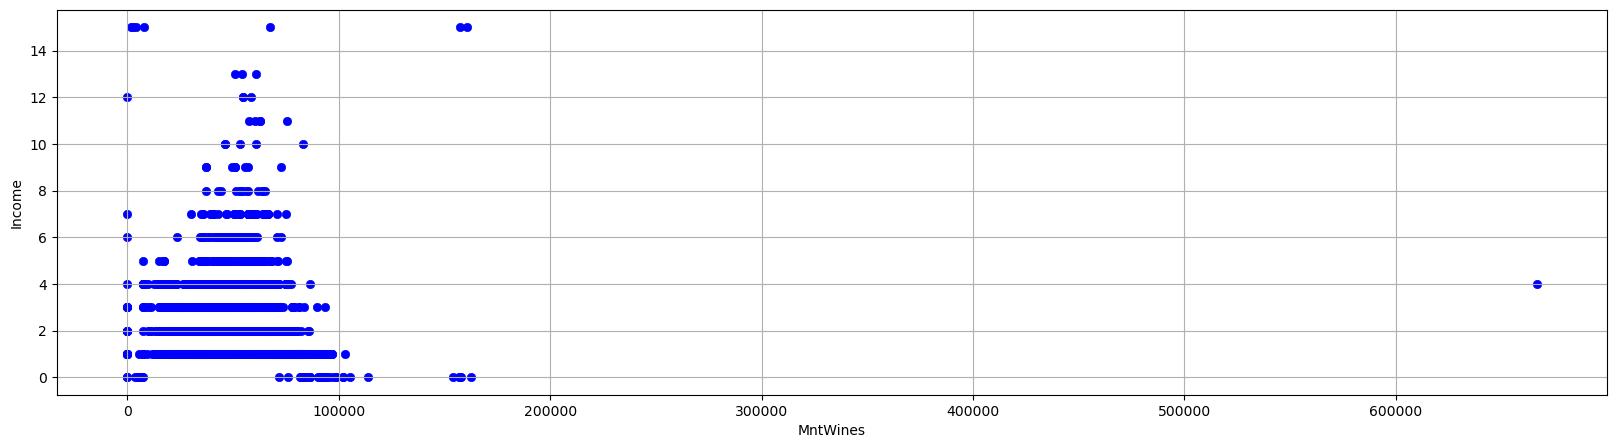

In [6]:
plt.figure(figsize=(20, 5))  # Adjust figure size if needed
plt.scatter( df['Income'],df['NumDealsPurchases'], color='blue', linewidth=0.5)
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.grid(True)
plt.show()


In [7]:
from sklearn.ensemble import IsolationForest

# Instantiate the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the model to your data
iso_forest.fit(df[['Income']])  # Make sure to pass a DataFrame or 2D array

# Predict outliers/anomalies
outlier_preds = iso_forest.predict(df[['Income']])

# Filter out inliers
df = df[outlier_preds==1] # Select rows where predictions are inliers




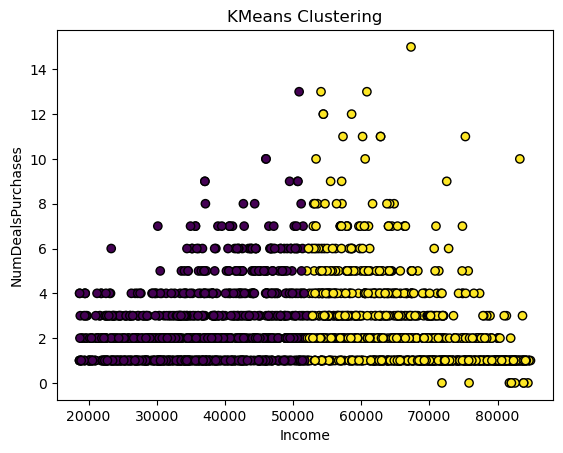

In [8]:
from sklearn.cluster import KMeans

# Select the columns for clustering
X = df[['Income', 'NumDealsPurchases']]

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X['Income'], X['NumDealsPurchases'], c=cluster_labels, cmap='viridis', marker='o', edgecolors='k')
plt.xlabel('Income')
plt.ylabel('NumDealsPurchases')
plt.title('KMeans Clustering')
plt.show()


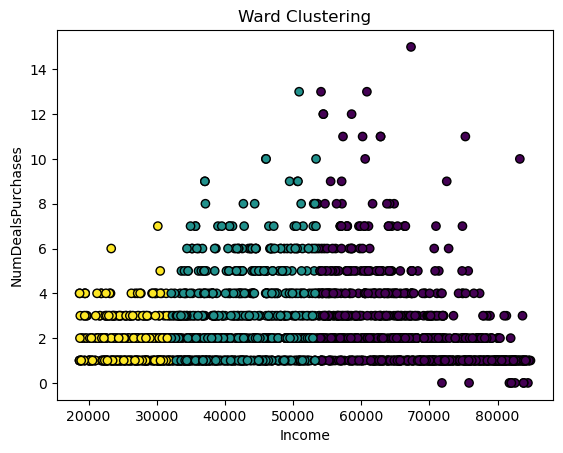

In [12]:
from sklearn.cluster import AgglomerativeClustering

# Select the columns for clustering
X = df[['Income', 'NumDealsPurchases']]

# Instantiate the AgglomerativeClustering model with Ward linkage
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the model to the data
ward.fit(X)

# Get the cluster labels
cluster_labels = ward.labels_

# Visualize the clusters
plt.scatter(X['Income'], X['NumDealsPurchases'], c=cluster_labels, cmap='viridis', marker='o', edgecolors='k')
plt.xlabel('Income')
plt.ylabel('NumDealsPurchases')
plt.title('Ward Clustering')
plt.show()


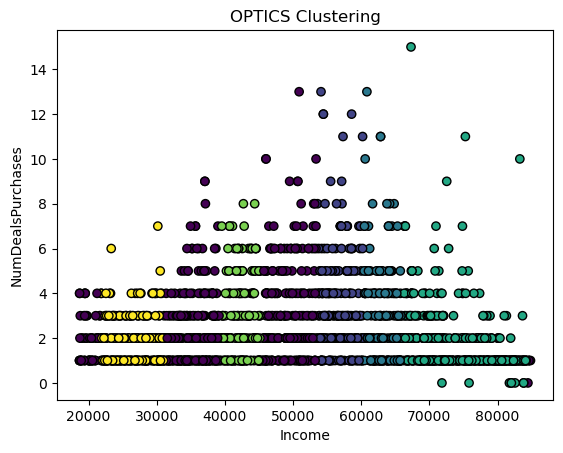

In [15]:
from sklearn.cluster import OPTICS

# Instantiate OPTICS with desired parameters
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)

# Fit the model to the data
optics.fit(df[['Income', 'NumDealsPurchases']])

# Get cluster labels
cluster_labels = optics.labels_

# Visualize the clusters or perform further analysis
plt.scatter(df['Income'], df['NumDealsPurchases'], c=cluster_labels, cmap='viridis', marker='o', edgecolors='k')
plt.xlabel('Income')
plt.ylabel('NumDealsPurchases')
plt.title('OPTICS Clustering')
plt.show()
